## Customer Segmentation on the clients of a Wholesale distributor

Market/customer segmentation is a unsupervised learning task which has a lot of applications. It helps business and company owners to employ targetted marketing and customer retention campaigns.

In this project, we are trying to segment the customers of a wholesale distributor.

First, let's import the required packages and also download the dataset from Kaggle by using its API.

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from random import randint

In [ ]:
!mkdir .kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"muhammedsalihkgp","key":"a40055bd26eab67ac9aea2a2b1d16e5b"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv

--2020-06-16 00:50:52--  https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15021 (15K) [application/x-httpd-php]
Saving to: ‘Wholesale customers data.csv’

Wholesale customers 100%[===================>]  14.67K  --.-KB/s    in 0.06s   

2020-06-16 00:50:52 (239 KB/s) - ‘Wholesale customers data.csv’ saved [15021/15021]



In [ ]:
df = pd.read_csv('Wholesale customers data.csv')

In [ ]:
df.shape

(440, 8)

We can see that the dataset contains 440 rows and 8 features.

In [ ]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Let's do some basic exploratory analysis on the dataset using visualisations. We will try to understand how the sales varies across the regions and channels by analysiing the mean values across categories.

We will define a function to generate the required plots.

In [ ]:
def plot_mean(feature,data =df):
  temp = data.groupby(feature).mean()
  if len(temp.columns) > 6:
    temp.drop(temp.columns[list(range(len(temp.columns) - 6))], axis =1, inplace=True)
  temp.reset_index(inplace=True)
  temp = temp.melt(id_vars=feature, var_name = 'Category', value_name= 'Mean Sales')
  sns.catplot("Category", "Mean Sales", col=feature, data=temp, height=8, kind="bar")

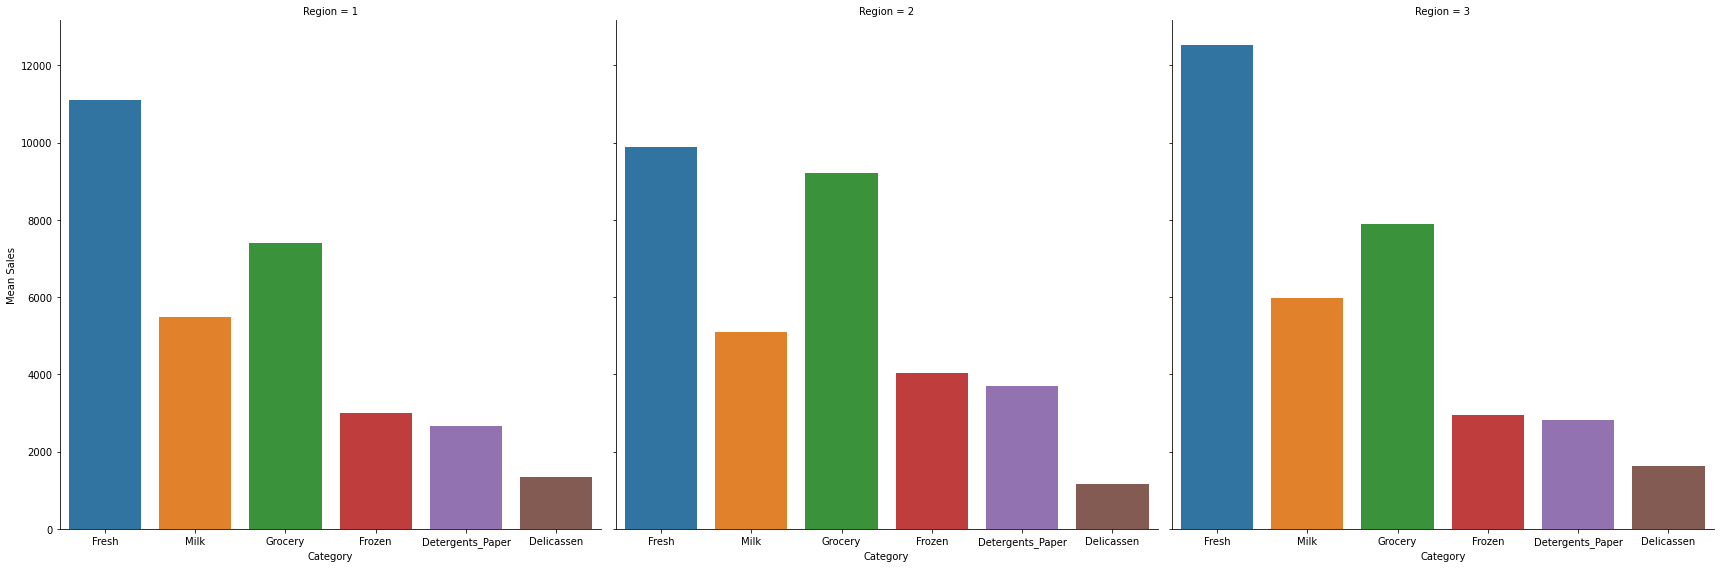

In [ ]:
plot_mean('Region')

We can see a similar pattern in all the three regions, except for the categories 'Fresh' and 'Grocery' where there are some variations. 

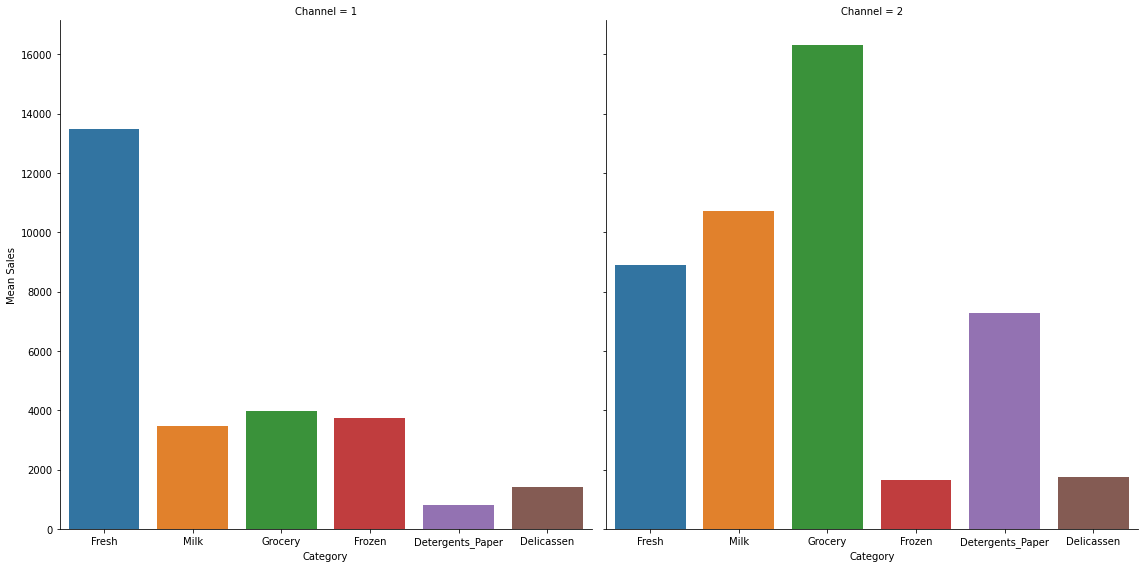

In [ ]:
plot_mean('Channel')

Comparing the channels, we see an expected trend. For channel 1 (Hotel, Restaurants and Cafes), the dales are dominated by the category 'Fresh. In channel 2 (Retail), we see that categories like 'Grocery, 'Milk' along with 'Fresh' are the dominating categories. In channel 2, 'Detergents_Paper' category is also much higher than that in channel 1.

For the cluster analysis, we will not be using the Channel and Region columns.

In [ ]:
df_cluster = df.drop(columns = ['Region', 'Channel'])

In [ ]:
df_cluster

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


Before going ahead with the clustering exercise, let's scale the data. We will use sklearn's StandardScaler for that purpose.

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(df_cluster)

Now, we have to find the optimal number of clusters. We will use the elbow method for that.

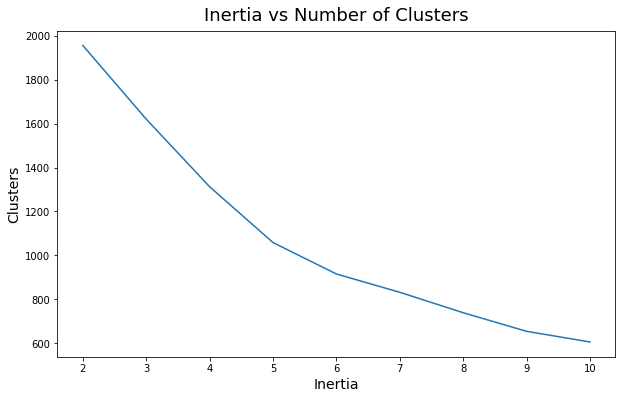

In [ ]:
inertia = []
for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=0).fit(X)
  inertia.append(kmeans.inertia_)

plt.figure(figsize = (10,6))
plt.title('Inertia vs Number of Clusters', fontsize = 18, pad=10)
plt.xlabel('Inertia', fontsize = 14)
plt.ylabel('Clusters', fontsize = 14)
plt.plot(range(2,11), inertia)

There is no clear elbow. But 5 seems to be a good choice for the number of clusters. Now let's go ahead and do the clustering.

In [ ]:
kmeans = KMeans(n_clusters=5, random_state=0).fit(X)
df['Cluster'] = kmeans.labels_

In [ ]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Cluster
0,2,3,12669,9656,7561,214,2674,1338,0
1,2,3,7057,9810,9568,1762,3293,1776,4
2,2,3,6353,8808,7684,2405,3516,7844,4
3,1,3,13265,1196,4221,6404,507,1788,0
4,2,3,22615,5410,7198,3915,1777,5185,2
...,...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204,2
436,1,3,39228,1431,764,4510,93,2346,2
437,2,3,14531,15488,30243,437,14841,1867,4
438,1,3,10290,1981,2232,1038,168,2125,0


Now let's see what each of our 5 clusters represent. We will do it using similar visualisations.

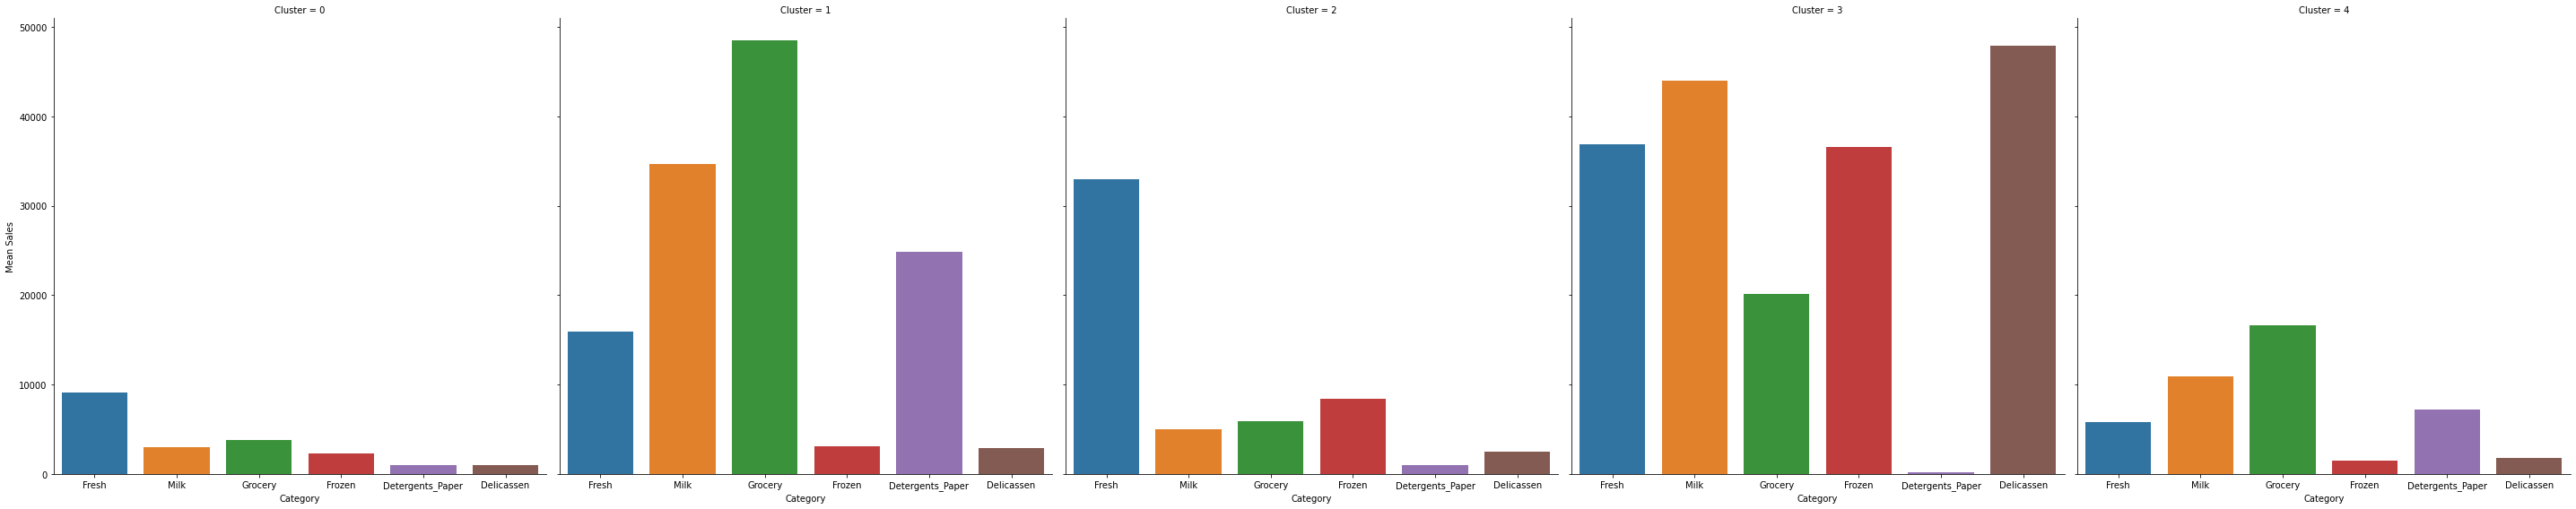

In [ ]:
plot_mean('Cluster')

Cluster 0 - Low paying customers.
Cluster 1 - Customers where Grocery, Milk and Detergent Sales dominate.
Cluster 2 - Customers where Fresh Sales dominate.
Cluster 3 - High paying customers.
Cluster 4 - Customers with behaviour similar to Cluster 1, but paying less.

Now let's see the Region and Channel wise distributrion of clients across the clusters.

In [ ]:
table = pd.pivot_table(df, values='Fresh', index=['Cluster'], columns=['Region', 'Channel'], aggfunc='count')

In [ ]:
table

Region      1           2            3      
Channel     1     2     1     2      1     2
Cluster                                     
0        46.0   4.0  26.0   4.0  161.0  29.0
1         NaN   2.0   NaN   1.0    NaN   7.0
2         8.0   NaN   2.0   2.0   45.0   6.0
3         NaN   NaN   NaN   NaN    1.0   NaN
4         5.0  12.0   NaN  12.0    4.0  63.0